# Cell Types Project
*Replace this with the name of your project*

## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Captain Marvel**: You know, blowing up things and such.
- **Ant Man**: Cleverly sneaking into small spaces
- **Hulk**: AKA The "Muscle"

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

*Fill in your research question here*

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [1]:
# Pandas, Scipy, Matplotlibray, and Numpy are imported to faciliate the process of data manipulation, data analysis,
# and data visualization
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

## Data Wrangling

Describe your data wrangling steps here.

In [2]:
# Electrophysiology dataset for projection neurons in basolateral and lateral amygdala
# Import the ephys csv from NeuroElectro to pandas dataframe and display the first few rows of data. 
cell_ephys_df = pd.read_csv('article_ephys_metadata_curated.csv',sep='\t',index_col = 'Index')
cell_ephys_df.head()

,Title,Pmid,PubYear,LastAuthor,ArticleID,TableID,NeuronName,NeuronLongName,NeuronPrefName,NeuroNERAnnots,...,sahpvolt_err,sahpvolt_n,sahpvolt_sd,sahpvolt_note,mahpvolt,mahpvolt_raw,mahpvolt_err,mahpvolt_n,mahpvolt_sd,mahpvolt_note
Index,,,,,,,,,,,,,,,,,,,,,
150,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex basket cell,medial prefrontal cortex fast spiking interne...,medial prefrontal cortex fast spiking interne...,"[ABA_REGION:714, HBP_EPHYS:0000080, HBP_EPHYS_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex Martinotti cell,medial prefrontal cortex low-threshold spiking...,medial prefrontal cortex low-threshold spiking...,"[ABA_REGION:714, HBP_EPHYS:0000110, HBP_EPHYS_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex basket cell,somatosensory cortex fast-firing interneuron,somatosensory cortex fast-firing interneuron,"[ABA_REGION:453, HBP_EPHYS:0000080, HBP_EPHYS_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex interneuron deep,somatosensory cortex non-fast firing interneuron,somatosensory cortex non-fast firing interneuron,"[ABA_REGION:453, HBP_EPHYS:0000090, HBP_EPHYS:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Age-related changes to layer 3 pyramidal cells...,24323499,2015,Peters A,88469,36033.0,Neocortex pyramidal cell layer 2-3,Primary visual cortex layer 3 pyramidal aged n...,Primary visual cortex layer 3 pyramidal aged n...,"[ABA_REGION:385, HBP_LAYER:0000003, HBP_MORPHO...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Sort through the species column to isolate data for mice and rats
mice_ephys_df = cell_ephys_df[(cell_ephys_df['Species'] == 'Rats') | (cell_ephys_df['Species'] == 'Mice')]
mice_ephys_df

,Title,Pmid,PubYear,LastAuthor,ArticleID,TableID,NeuronName,NeuronLongName,NeuronPrefName,NeuroNERAnnots,...,sahpvolt_err,sahpvolt_n,sahpvolt_sd,sahpvolt_note,mahpvolt,mahpvolt_raw,mahpvolt_err,mahpvolt_n,mahpvolt_sd,mahpvolt_note
Index,,,,,,,,,,,,,,,,,,,,,
150,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex basket cell,medial prefrontal cortex fast spiking interne...,medial prefrontal cortex fast spiking interne...,"[ABA_REGION:714, HBP_EPHYS:0000080, HBP_EPHYS_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex Martinotti cell,medial prefrontal cortex low-threshold spiking...,medial prefrontal cortex low-threshold spiking...,"[ABA_REGION:714, HBP_EPHYS:0000110, HBP_EPHYS_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex basket cell,somatosensory cortex fast-firing interneuron,somatosensory cortex fast-firing interneuron,"[ABA_REGION:453, HBP_EPHYS:0000080, HBP_EPHYS_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Cell type-specific effects of adenosine on cor...,24108800,2015,Feldmeyer D,88449,35984.0,Neocortex interneuron deep,somatosensory cortex non-fast firing interneuron,somatosensory cortex non-fast firing interneuron,"[ABA_REGION:453, HBP_EPHYS:0000090, HBP_EPHYS:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,Developmental increase in hyperpolarization-ac...,25450961,2015,Kitamura K,92581,47710.0,Vestibular ganglion cell,NaN,Vestibular ganglion cell,"[UNKN_REGION:4412, NeuronTrigger:cell]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Development of firing patterns and electrical ...,8852366,1996,Carlen PL,27501,NaN,Thalamus relay cell,NaN,Thalamus relay cell,"[ABA_REGION:549, Missing:relay, NeuronTrigger:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
921,Modulation of hippocampal synaptic transmissio...,8931019,1996,Velumian AA,82456,24554.0,Hippocampus CA1 pyramidal cell,NaN,Hippocampus CA1 pyramidal cell,"[ABA_REGION:382, HBP_MORPHOLOGY:0000001, Neuro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,Membrane properties of rat suprachiasmatic nuc...,8229799,1993,Dudek FE,39223,NaN,Suprachiasmatic nucleus neuron,NaN,Suprachiasmatic nucleus neuron,"[ABA_REGION:286, NeuronTrigger:neuron]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Select rows that contain CA1/CA3 pyramidal cells data and put them into separate dataframe
basolateral_df = mice_ephys_df[mice_ephys_df['NeuronName']  == 'Amygdala basolateral nucleus pyramidal neuron']
lateral_df = mice_ephys_df[mice_ephys_df['NeuronName']  == 'Lateral amygdala projection neuron']


# As we can see that first few columns contain general information.
# Drop all the columns that contains general information. 
# We are only interested in the measured value for each eletrophysiological features.
# The Nan values would be taken care of later. 
first_ephys_index = basolateral_df.columns.get_loc('rin')

basolateral_ephys_df = basolateral_df[basolateral_df.columns[first_ephys_index:]]
lateral_ephys_df = lateral_df[lateral_df.columns[first_ephys_index:]]

basolateral_df.shape

(14, 352)

In [5]:
lateral_ephys_df.shape

(2, 312)

In [6]:
basolateral_ephys_df

,rin,rin_raw,rin_err,rin_n,rin_sd,rin_note,rmp,rmp_raw,rmp_err,rmp_n,...,sahpvolt_err,sahpvolt_n,sahpvolt_sd,sahpvolt_note,mahpvolt,mahpvolt_raw,mahpvolt_err,mahpvolt_n,mahpvolt_sd,mahpvolt_note
Index,,,,,,,,,,,,,,,,,,,,,
0,134.30,134.30,5.00,13.0,18.027756,NaN,-68.00,-68.00,0.60,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,166.60,166.60,16.78,16.0,67.120000,NaN,-67.65,-67.65,0.77,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,169.14,169.14,11.67,65.0,94.086548,NaN,-69.35,-69.35,0.72,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,155.00,155.00,7.69,45.0,51.586088,NaN,-67.31,-67.31,0.88,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,127.00,127.00,12.00,NaN,NaN,NaN,-61.00,-61.00,1.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,287.90,287.90,23.30,13.0,84.009345,NaN,NaN,13.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,59.00,59.00,3.41,13.0,12.294930,NaN,-61.00,-61.00,0.81,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,63.00,63.00,7.30,NaN,NaN,NaN,-70.00,-70.00,6.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,77.50,77.50,4.60,31.0,25.611716,NaN,-64.40,-64.40,1.00,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis & Results

Include cells that describe the steps in your data analysis.

pick several electrophysiology features for the further analysis:
input resistance (rin);
resting membrane potential (rmp);
spike half width (aphw);
spike threshold (apthr);
AHP amplitude (ahpamp)


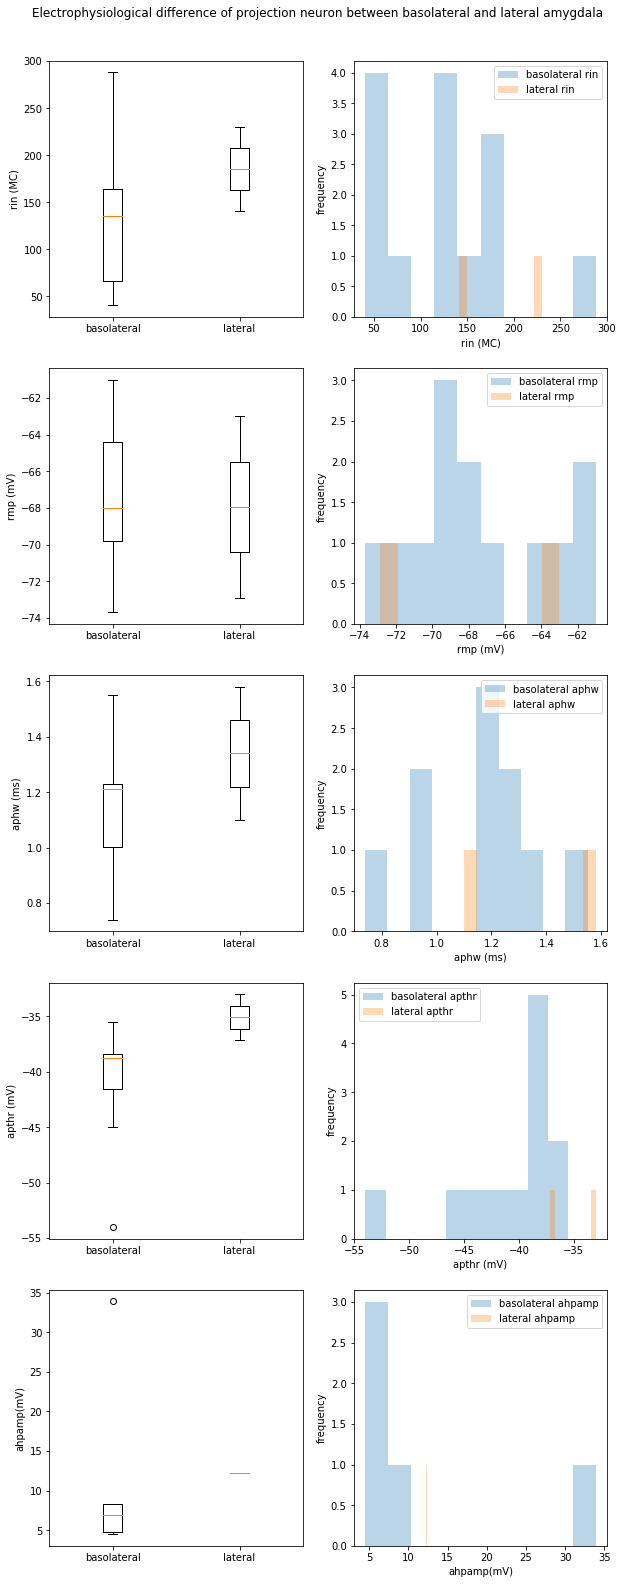

In [39]:
#fig,ax = plt.subplots(4, 2, figsize=(10,25))
fig,ax = plt.subplots(5, 2, figsize=(10,25))
ephys_feature_list = ["rin", 'rmp', 'aphw', 'apthr', 'ahpamp']
ephys_feature_title_list = ['rin (MC)', 'rmp (mV)', 'aphw (ms)','apthr (mV)', 'ahpamp(mV)']

index = 0

for item in ephys_feature_list:
    # for each subplot on the left, plot the disparity of each electrophysiological features recording via boxplot
    ephys_data_basolateral = basolateral_ephys_df[item].dropna()
    ephys_data_lateral = lateral_ephys_df[item].dropna()
    ax[index, 0].boxplot([ephys_data_basolateral, ephys_data_lateral])
    ax[index, 0].set_xticklabels(["basolateral","lateral"])
    ax[index, 0].set_ylabel(ephys_feature_title_list[index])
    
    # for each subplot on the right, plot the frequency of each recorded value for each feature via histogram
    # alpha is to adjust the transparency 
    ax[index, 1].hist(ephys_data_basolateral,alpha = 0.3)
    ax[index, 1].hist(ephys_data_lateral,alpha = 0.3)
    ax[index, 1].legend(['basolateral ' + item ,'lateral ' + item])
    ax[index, 1].set_xlabel(ephys_feature_title_list[index]) 
    ax[index, 1].set_ylabel('frequency')
    
    index += 1

plt.suptitle("Electrophysiological difference of projection neuron between basolateral and lateral amygdala ")
fig.subplots_adjust(top=0.95)
plt.show()

In [7]:
ephys_feature_list = ["rin", 'rmp', 'aphw', 'apthr', 'ahpamp']
ephys_feature_title_list = ['rin (MC)', 'rmp (mV)', 'aphw (ms)','apthr (mV)', 'ahpamp(mV)']

ephys_data_basolateral_rin = pd.DataFrame(basolateral_ephys_df['rin'].dropna())
print(len(ephys_data_basolateral_rin))

ephys_data_lateral_rin = pd.DataFrame(lateral_ephys_df['rin'].dropna())
print(len(ephys_data_lateral_rin))

14
2


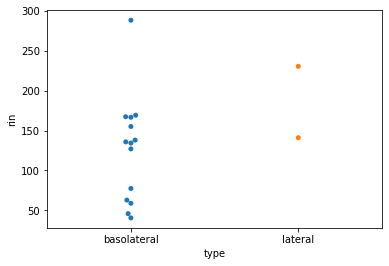

In [8]:
ephys_data_basolateral_rin['type'] = ['basolateral', 'basolateral','basolateral','basolateral','basolateral','basolateral',
                                     'basolateral','basolateral','basolateral','basolateral','basolateral','basolateral',
                                     'basolateral','basolateral']
ephys_data_lateral_rin['type'] = ['lateral','lateral']
ephys_frames_rin = [ephys_data_basolateral_rin,ephys_data_lateral_rin]
ephys_data_rin = pd.concat(ephys_frames_rin)

sns.swarmplot(x='type',y = 'rin', data = ephys_data_rin)

plt.show()

In [9]:
ephys_data_basolateral_rmp = pd.DataFrame(basolateral_ephys_df['rmp'].dropna())
print(len(ephys_data_basolateral_rmp))

ephys_data_lateral_rmp = pd.DataFrame(lateral_ephys_df['rmp'].dropna())
print(len(ephys_data_lateral_rmp))

13
2


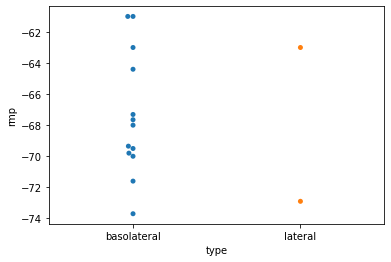

In [10]:
ephys_data_basolateral_rmp['type'] = ['basolateral', 'basolateral','basolateral','basolateral','basolateral','basolateral',
                                     'basolateral','basolateral','basolateral','basolateral','basolateral','basolateral',
                                     'basolateral']
ephys_data_lateral_rmp['type'] = ['lateral','lateral']
ephys_frames_rmp = [ephys_data_basolateral_rmp,ephys_data_lateral_rmp]
ephys_data_rmp = pd.concat(ephys_frames_rmp)

sns.swarmplot(x='type',y = 'rmp', data = ephys_data_rmp)

plt.show()

In [11]:
ephys_data_basolateral_aphw = pd.DataFrame(basolateral_ephys_df['aphw'].dropna())
print(len(ephys_data_basolateral_aphw))

ephys_data_lateral_aphw = pd.DataFrame(lateral_ephys_df['aphw'].dropna())
print(len(ephys_data_lateral_aphw))

10
2


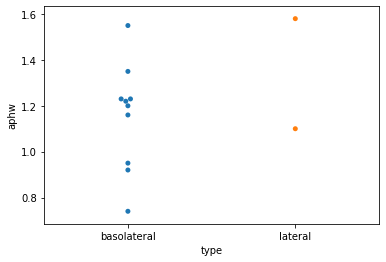

In [12]:
ephys_data_basolateral_aphw['type'] = ['basolateral', 'basolateral','basolateral','basolateral','basolateral','basolateral',
                                     'basolateral','basolateral','basolateral','basolateral']

ephys_data_lateral_aphw['type'] = ['lateral','lateral']
ephys_frames_aphw = [ephys_data_basolateral_aphw,ephys_data_lateral_aphw]
ephys_data_aphw = pd.concat(ephys_frames_aphw)

sns.swarmplot(x='type',y = 'aphw', data = ephys_data_aphw)

plt.show()

In [13]:
ephys_data_basolateral_apthr = pd.DataFrame(basolateral_ephys_df['apthr'].dropna())
print(len(ephys_data_basolateral_apthr))

ephys_data_lateral_apthr = pd.DataFrame(lateral_ephys_df['apthr'].dropna())
print(len(ephys_data_lateral_apthr))

12
2


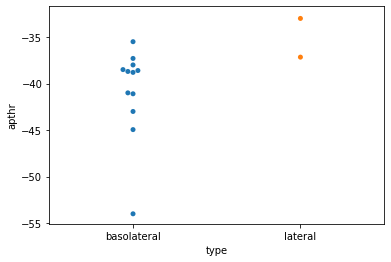

In [14]:
ephys_data_basolateral_apthr['type'] = ['basolateral', 'basolateral','basolateral','basolateral','basolateral','basolateral',
                                     'basolateral','basolateral','basolateral','basolateral','basolateral','basolateral']
ephys_data_lateral_apthr['type'] = ['lateral','lateral']
ephys_frames_apthr = [ephys_data_basolateral_apthr,ephys_data_lateral_apthr]
ephys_data_apthr = pd.concat(ephys_frames_apthr)

sns.swarmplot(x='type',y = 'apthr', data = ephys_data_apthr)

plt.show()

In [15]:
ephys_data_basolateral_ahpamp = pd.DataFrame(basolateral_ephys_df['ahpamp'].dropna())
print(len(ephys_data_basolateral_ahpamp))

ephys_data_lateral_ahpamp = pd.DataFrame(lateral_ephys_df['ahpamp'].dropna())
print(len(ephys_data_lateral_ahpamp))

5
1


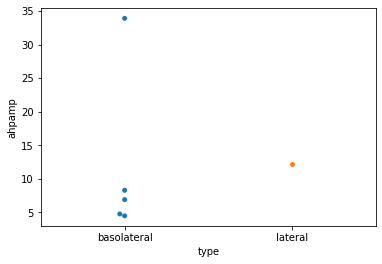

In [16]:
ephys_data_basolateral_ahpamp['type'] = ['basolateral', 'basolateral','basolateral','basolateral','basolateral']
ephys_data_lateral_ahpamp['type'] = ['lateral']
ephys_frames_ahpamp = [ephys_data_basolateral_ahpamp,ephys_data_lateral_ahpamp]
ephys_data_ahpamp = pd.concat(ephys_frames_ahpamp)

sns.swarmplot(x='type',y = 'ahpamp', data = ephys_data_ahpamp)

plt.show()

## Conclusion & Discussion

*Fill in your discussion information here*